In [ ]:
!pip install qiskit
import numpy as np
import pandas as pd

# Create synthetic features
np.random.seed(42)  # for reproducibility

# Healthy people (class = 0)
healthy_oxygen = np.random.uniform(0.7, 1.0, 50)
healthy_hrv = np.random.uniform(0.6, 1.0, 50)

# Diseased people (class = 1)
diseased_oxygen = np.random.uniform(0.3, 0.6, 50)
diseased_hrv = np.random.uniform(0.2, 0.5, 50)

# Combine data
oxygen = np.concatenate([healthy_oxygen, diseased_oxygen])
hrv = np.concatenate([healthy_hrv, diseased_hrv])

labels = np.array([0]*50 + [1]*50)

# Build DataFrame
df = pd.DataFrame({
    "oxygen": oxygen,
    "hrv": hrv,
    "label": labels
})

df.head()


from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = df[["oxygen", "hrv"]].values
y = df["label"].values

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

len(X_train), len(X_test)


from qiskit.circuit.library import ZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import Sampler
from qiskit_machine_learning.optimizers import COBYLA

# 1. Feature map for encoding 2 features into 2 qubits
feature_map = ZFeatureMap(feature_dimension=2, reps=1)

# 2. Variational circuit (trainable circuit)
ansatz = RealAmplitudes(num_qubits=2, reps=2)

# 3. Optimizer (classical)
optimizer = COBYLA(maxiter=200)

# 4. Sampler primitive (backend)
sampler = Sampler()

# 5. Build Quantum Classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss='cross_entropy',
    optimizer=optimizer,
    sampler=sampler
)

print("Quantum model ready.")

# Train the quantum classifier
vqc.fit(X_train, y_train)

print("Training complete!")




/tmp/ipython-input-879243726.py:61: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Quantum model ready.
Training complete!


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = vqc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy


1.0

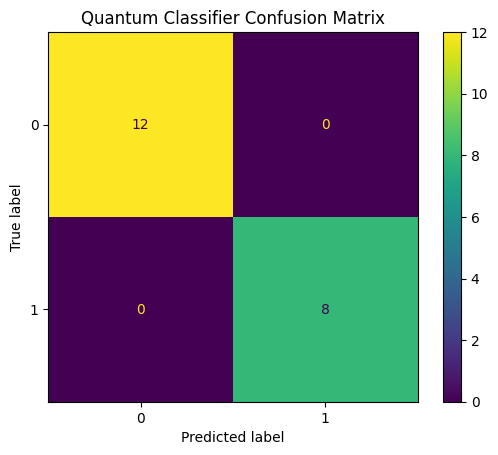

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Quantum Classifier Confusion Matrix")
plt.show()
